In [6]:
from futu import *
quote_ctx = OpenQuoteContext(host='127.0.0.1', port=11111)

ret_sub, err_message = quote_ctx.subscribe(['HK.00700'], [SubType.K_DAY], subscribe_push=False)
# 先订阅K 线类型。订阅成功后FutuOpenD将持续收到服务器的推送，False代表暂时不需要推送给脚本
if ret_sub == RET_OK:  # 订阅成功
    ret, data = quote_ctx.get_cur_kline('HK.00700', 1000, SubType.K_DAY, AuType.QFQ)  
                                        # 获取港股00700最近1000个K线数据
    if ret == RET_OK:
        print(data)
    else:
        print('error:', data)
else:
    print('subscription failed', err_message)
quote_ctx.close()  # 关闭当条连接，FutuOpenD会在1分钟后自动取消相应股票相应类型的订阅

2021-02-20 20:30:36,606 [open_context_base.py] _socket_reconnect_and_wait_ready:255: Start connecting: host=127.0.0.1; port=11111;
2021-02-20 20:30:36,608 [open_context_base.py] on_connected:344: Connected : conn_id=6; 
2021-02-20 20:30:36,617 [open_context_base.py] _handle_init_connect:445: InitConnect ok: conn_id=6; info={'server_version': 500, 'login_user_id': 11293829, 'conn_id': 6768869450900706323, 'conn_key': 'E20809C6C6926054', 'conn_iv': '6DDC171DC67B052C', 'keep_alive_interval': 10, 'is_encrypt': False};


         code             time_key    open   close    high     low    volume  \
0    HK.00700  2017-02-01 00:00:00  198.31  202.91  203.11  197.11  19494245   
1    HK.00700  2017-02-02 00:00:00  203.31  201.51  204.71  200.71  14245064   
2    HK.00700  2017-02-03 00:00:00  201.71  201.31  202.71  198.71  12525535   
3    HK.00700  2017-02-06 00:00:00  202.71  203.71  203.71  200.71   9244792   
4    HK.00700  2017-02-07 00:00:00  202.31  201.71  203.71  200.71  11540961   
..        ...                  ...     ...     ...     ...     ...       ...   
995  HK.00700  2021-02-11 00:00:00  763.00  757.00  763.00  749.00  10260559   
996  HK.00700  2021-02-16 00:00:00  762.50  745.00  766.50  741.00  23579965   
997  HK.00700  2021-02-17 00:00:00  741.00  757.50  763.00  730.50  16036516   
998  HK.00700  2021-02-18 00:00:00  767.00  747.50  775.50  745.00  24241947   
999  HK.00700  2021-02-19 00:00:00  747.00  741.00  747.50  726.00  22589560   

         turnover  pe_ratio  turnover_r

2021-02-20 20:30:36,706 [network_manager.py] work:366: Close: conn_id=6


In [7]:
data

,code,time_key,open,close,high,low,volume,turnover,pe_ratio,turnover_rate,last_close
0,HK.00700,2017-02-01 00:00:00,198.31,202.91,203.11,197.11,19494245,3.976775e+09,56.727,0.00206,200.71
1,HK.00700,2017-02-02 00:00:00,203.31,201.51,204.71,200.71,14245064,2.932257e+09,56.342,0.00150,202.91
2,HK.00700,2017-02-03 00:00:00,201.71,201.31,202.71,198.71,12525535,2.556502e+09,56.287,0.00132,201.51
3,HK.00700,2017-02-06 00:00:00,202.71,203.71,203.71,200.71,9244792,1.903965e+09,56.946,0.00098,201.31
4,HK.00700,2017-02-07 00:00:00,202.31,201.71,203.71,200.71,11540961,2.374053e+09,56.397,0.00122,203.71
...,...,...,...,...,...,...,...,...,...,...,...
995,HK.00700,2021-02-11 00:00:00,763.00,757.00,763.00,749.00,10260559,7.749505e+09,70.510,0.00107,761.00
996,HK.00700,2021-02-16 00:00:00,762.50,745.00,766.50,741.00,23579965,1.773283e+10,69.392,0.00246,757.00
997,HK.00700,2021-02-17 00:00:00,741.00,757.50,763.00,730.50,16036516,1.204488e+10,70.557,0.00167,745.00
998,HK.00700,2021-02-18 00:00:00,767.00,747.50,775.50,745.00,24241947,1.843508e+10,69.625,0.00253,757.50


In [8]:
type(data)

pandas.core.frame.DataFrame

In [10]:
date = data["time_key"].str.rstrip('\000:0')#删掉结尾的空格、冒号以及数字0
date

0      2017-02-01 
1      2017-02-02 
2      2017-02-03 
3      2017-02-06 
4      2017-02-07 
          ...     
995    2021-02-11 
996    2021-02-16 
997    2021-02-17 
998    2021-02-18 
999    2021-02-19 
Name: time_key, Length: 1000, dtype: object

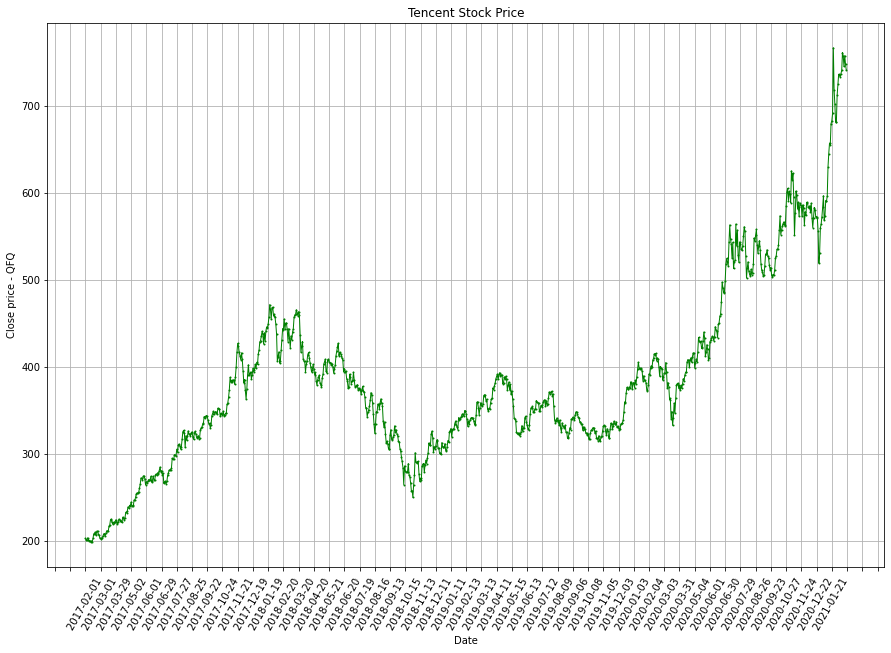

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(15, 10)) # Set the size
plt.plot(date,data["close"],linewidth=1,color='g',marker='o',markerfacecolor='blue',markersize=1) # use date
plt.xlabel("Date")
plt.ylabel('Close price - QFQ') # 前复权
plt.title("Tencent Stock Price")
# plt.legend()
plt.grid()

plt.xticks(rotation=60)    # 设置x轴标签旋转角度
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))# 设置横轴标签间隔
plt.savefig('./Tencent_stock_peice_since_20170201.jpg')
plt.show()

In [ ]:
# 策略：
# 2017-02-01全仓（5万港元）买入，初始化long_basis_for_sell为当日[开盘价]
# 做如下循环：
# 如果某天的[开盘价]>=long_ref_upper_for_sell或者<=long_ref_lower_for_sell，则当天全部清仓；
# 如果当天未清仓，则更新long_basis_for_sell为当日的[最高价]。以此循环，持有直到清仓。
# 以清仓那天的[收盘价]为zero_basis_for_buy，并固定住zer_ref_lower_for_buy为此basis的某个百分数。
# 当某天[开盘价]<=zer_ref_lower_for_buy或者>=zero_ref_upper_for_buy时，
# 全仓买入，并以买入日的[收盘价]为long_basis_for_sell
# 如果当天未买入，则更新zero_basis_for_buy为当日的[最低价]并依此更新zero_ref_upper_for_buy

# long_basis_for_sell: long_ref_upper_for_sell, long_ref_lower_for_sell
# zero_basis_for_buy: zero_ref_upper_for_buy, zer_ref_lower_for_buy


In [ ]:
# Date # Action={Buy, Sell, No action} # Number of holding shares # Close price #  Close Value 
# P&L # Return

In [35]:
date.name = None
date.name

In [70]:
data['close']

0      202.91
1      201.51
2      201.31
3      203.71
4      201.71
        ...  
995    757.00
996    745.00
997    757.50
998    747.50
999    741.00
Name: close, Length: 1000, dtype: float64

In [138]:
strategy_record = pd.DataFrame(columns = ['Date', 'Action', '#holding shares', 'Open','High','Low','Close', 'Close value', 'Cash', 'Total value', 'P&L', 'Return'])
strategy_record

,Date,Action,#holding shares,Open,High,Low,Close,Close value,Cash,Total value,P&L,Return


In [139]:
import numpy as np
strategy_record['Date'] = date # 整列赋值需要保证等号左右两边的DF都要有相同的索引，在这个例子中是0，1，...，1000
strategy_record['Close'] = data['close']
strategy_record['Open'] = data['open']
strategy_record['High'] = data['high']
strategy_record['Low'] = data['low']
strategy_record

,Date,Action,#holding shares,Open,High,Low,Close,Close value,Cash,Total value,P&L,Return
0,2017-02-01,NaN,NaN,198.31,203.11,197.11,202.91,NaN,NaN,NaN,NaN,NaN
1,2017-02-02,NaN,NaN,203.31,204.71,200.71,201.51,NaN,NaN,NaN,NaN,NaN
2,2017-02-03,NaN,NaN,201.71,202.71,198.71,201.31,NaN,NaN,NaN,NaN,NaN
3,2017-02-06,NaN,NaN,202.71,203.71,200.71,203.71,NaN,NaN,NaN,NaN,NaN
4,2017-02-07,NaN,NaN,202.31,203.71,200.71,201.71,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021-02-11,NaN,NaN,763.00,763.00,749.00,757.00,NaN,NaN,NaN,NaN,NaN
996,2021-02-16,NaN,NaN,762.50,766.50,741.00,745.00,NaN,NaN,NaN,NaN,NaN
997,2021-02-17,NaN,NaN,741.00,763.00,730.50,757.50,NaN,NaN,NaN,NaN,NaN
998,2021-02-18,NaN,NaN,767.00,775.50,745.00,747.50,NaN,NaN,NaN,NaN,NaN


In [140]:
# 初始化首日的持仓
initial_wealth = 50000
long_basis_for_sell = data.at[0, 'open'] #以第一天的开盘价买入，作为下次卖出的基础点

# 设置参考点的上下边界因子
factor_upper = 1.15
factor_lower = 0.90

# 设置第一次卖出的参考点的上下边界
long_ref_upper_for_sell = long_basis_for_sell * factor_upper
long_ref_lower_for_sell = long_basis_for_sell * factor_lower
print(long_basis_for_sell, format(long_ref_upper_for_sell, '0.2f'), format(long_ref_lower_for_sell, '0.2f'))

198.31 228.06 178.48


In [141]:
# 初始化首日的仓位情况
strategy_record.at[0, 'Action'] = 'Buy'
strategy_record.at[0, '#holding shares'] = int( initial_wealth // (long_basis_for_sell*100) * 100 )
# 当天的现金是财富减去当天买入股数*买入的开盘价
strategy_record.at[0, 'Cash'] = initial_wealth - strategy_record.at[0, '#holding shares'] * data.at[0, 'open']
strategy_record.at[0, 'Close value'] = strategy_record.at[0, '#holding shares'] * strategy_record.at[0, 'Close']
strategy_record.at[0, 'Total value'] = strategy_record.at[0, 'Close value'] + strategy_record.at[0, 'Cash']
# 计算相对于初始财富的累积P&L
strategy_record.at[0, 'P&L'] = strategy_record.at[0, 'Total value'] - initial_wealth
strategy_record.at[0, 'Return'] =  '{:.2%}'.format(strategy_record.at[0, 'P&L'] / initial_wealth) 
strategy_record

,Date,Action,#holding shares,Open,High,Low,Close,Close value,Cash,Total value,P&L,Return
0,2017-02-01,Buy,200,198.31,203.11,197.11,202.91,40582.0,10338.0,50920.0,920.0,1.84%
1,2017-02-02,NaN,NaN,203.31,204.71,200.71,201.51,NaN,NaN,NaN,NaN,NaN
2,2017-02-03,NaN,NaN,201.71,202.71,198.71,201.31,NaN,NaN,NaN,NaN,NaN
3,2017-02-06,NaN,NaN,202.71,203.71,200.71,203.71,NaN,NaN,NaN,NaN,NaN
4,2017-02-07,NaN,NaN,202.31,203.71,200.71,201.71,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2021-02-11,NaN,NaN,763.00,763.00,749.00,757.00,NaN,NaN,NaN,NaN,NaN
996,2021-02-16,NaN,NaN,762.50,766.50,741.00,745.00,NaN,NaN,NaN,NaN,NaN
997,2021-02-17,NaN,NaN,741.00,763.00,730.50,757.50,NaN,NaN,NaN,NaN,NaN
998,2021-02-18,NaN,NaN,767.00,775.50,745.00,747.50,NaN,NaN,NaN,NaN,NaN


In [ ]:
# if 昨天的#holding shares > 0:
    # 看今天的开盘价是不是碰触到了我的卖出参考点区间的上下边界
        # 如果是，则以开盘价清仓更新数据，设置zero_basis_for_buy为卖出价，并固定zer_ref_lower_for_buy和zer_ref_upper_for_buy
        # 如果不是，则今天不交易，[若今天的最高价>long_basis_for_sell，则更新long_basis_for_sell，并以此更新long_ref_upper_for_sell和long_ref_lower_for_sell]
# else （即昨天的持仓是0）
    # 看今天的开盘价是不是碰触到了我的买入参考点区间的上下边界
        # 如果是，则以开盘价全仓买入，设置long_basis_for_sell为买入价，并固定long_ref_lower_for_sell和long_ref_upper_for_sell
        # 如果不是，则今天不交易，若今天最低价<zero_basis_for_buy，则更新zero_basis_for_buy，并以此更新zer_ref_upper_for_buy，但不更新zer_ref_lower_for_buy

In [142]:
for i in range(1, 1000):
    if strategy_record.at[i-1, '#holding shares'] > 0:
        if data.at[i, 'open'] >= long_ref_upper_for_sell or data.at[i, 'open'] <= long_ref_lower_for_sell:
            strategy_record.at[i, 'Action'] = 'Sell'
            strategy_record.at[i, '#holding shares'] = 0
            strategy_record.at[i, 'Cash'] = strategy_record.at[i-1, 'Cash'] + strategy_record.at[i-1, '#holding shares'] * data.at[i, 'open']
            
            zero_basis_for_buy = data.at[i, 'open'] 
            zero_ref_lower_for_buy = zero_basis_for_buy * factor_lower
            zero_ref_upper_for_buy = zero_basis_for_buy * factor_upper
        else:
            strategy_record.at[i, 'Action'] = 'No action'
            strategy_record.at[i, '#holding shares'] = strategy_record.at[i-1, '#holding shares']
            strategy_record.at[i, 'Cash'] = strategy_record.at[i-1, 'Cash']
            if data.at[i, 'high'] > long_basis_for_sell:
                long_basis_for_sell = data.at[i, 'high']  
#                 long_ref_lower_for_sell = long_basis_for_sell * factor_lower
#                 long_ref_upper_for_sell = long_basis_for_sell * factor_upper
        
                
    else:
        if data.at[i, 'open'] >= zero_ref_upper_for_buy or data.at[i, 'open'] <= zero_ref_lower_for_buy:
            strategy_record.at[i, 'Action'] = 'Buy'
            strategy_record.at[i, '#holding shares'] = int( strategy_record.at[i-1, 'Total value'] // (data.at[i, 'open']*100) * 100 )
            strategy_record.at[i, 'Cash'] = strategy_record.at[i-1, 'Total value'] - strategy_record.at[i, '#holding shares'] * data.at[i, 'open']
        
            long_basis_for_sell = data.at[i, 'open'] 
            long_ref_lower_for_sell = long_basis_for_sell * factor_lower
            long_ref_upper_for_sell = long_basis_for_sell * factor_upper
            
        else:
            strategy_record.at[i, 'Action'] = 'No action'
            strategy_record.at[i, '#holding shares'] = strategy_record.at[i-1, '#holding shares']
            strategy_record.at[i, 'Cash'] = strategy_record.at[i-1, 'Cash']
            if data.at[i, 'low'] < zero_basis_for_buy:
                zero_basis_for_buy = data.at[i, 'low']
                zero_ref_upper_for_buy = zero_basis_for_buy * factor_upper
                
    strategy_record.at[i, 'Close value'] = strategy_record.at[i, '#holding shares'] * strategy_record.at[i, 'Close']
    strategy_record.at[i, 'Total value'] = strategy_record.at[i, 'Close value'] + strategy_record.at[i, 'Cash']
    # 计算相对于初始财富的累积P&L
    strategy_record.at[i, 'P&L'] = strategy_record.at[i, 'Total value'] - initial_wealth
    strategy_record.at[i, 'Return'] =  '{:.2%}'.format(strategy_record.at[i, 'P&L'] / initial_wealth) 
 


In [143]:
strategy_record.head(60)

,Date,Action,#holding shares,Open,High,Low,Close,Close value,Cash,Total value,P&L,Return
0,2017-02-01,Buy,200,198.31,203.11,197.11,202.91,40582.0,10338.0,50920.0,920.0,1.84%
1,2017-02-02,No action,200,203.31,204.71,200.71,201.51,40302.0,10338.0,50640.0,640.0,1.28%
2,2017-02-03,No action,200,201.71,202.71,198.71,201.31,40262.0,10338.0,50600.0,600.0,1.20%
3,2017-02-06,No action,200,202.71,203.71,200.71,203.71,40742.0,10338.0,51080.0,1080.0,2.16%
4,2017-02-07,No action,200,202.31,203.71,200.71,201.71,40342.0,10338.0,50680.0,680.0,1.36%
5,2017-02-08,No action,200,200.71,201.51,198.71,200.31,40062.0,10338.0,50400.0,400.0,0.80%
6,2017-02-09,No action,200,201.91,203.31,200.51,200.51,40102.0,10338.0,50440.0,440.0,0.88%
7,2017-02-10,No action,200,201.71,202.31,198.71,198.91,39782.0,10338.0,50120.0,120.0,0.24%
8,2017-02-13,No action,200,199.31,201.31,199.31,199.91,39982.0,10338.0,50320.0,320.0,0.64%
9,2017-02-14,No action,200,199.51,200.11,199.11,199.11,39822.0,10338.0,50160.0,160.0,0.32%


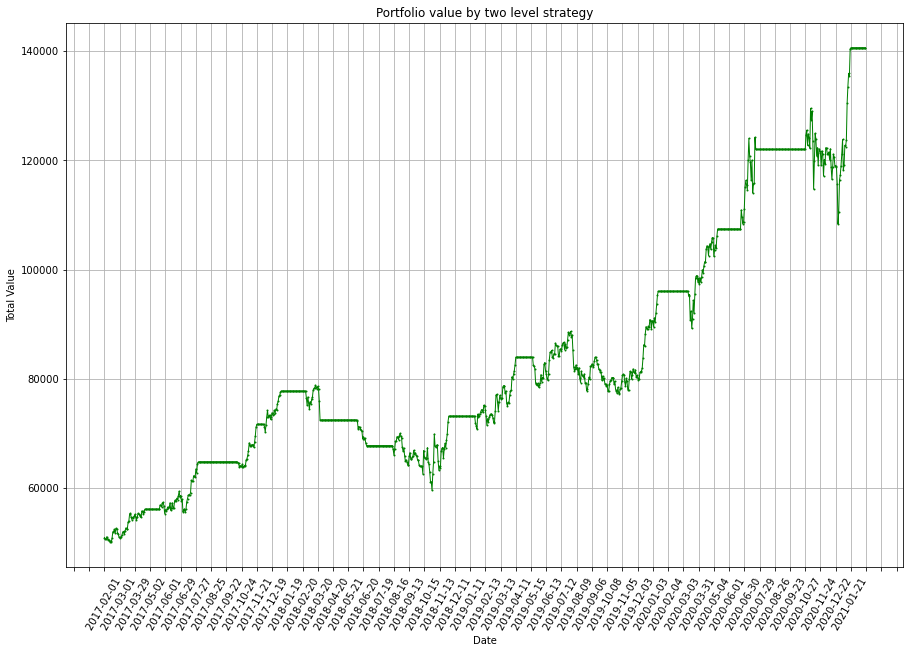

In [144]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(15, 10)) # Set the size
plt.plot(strategy_record['Date'],strategy_record["Total value"],linewidth=1,color='g',marker='o',markerfacecolor='blue',markersize=1) # use date
plt.xlabel("Date")
plt.ylabel('Total Value') # 前复权
plt.title("Portfolio value by two level strategy")
# plt.legend()
plt.grid()

plt.xticks(rotation=60)    # 设置x轴标签旋转角度
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(20))# 设置横轴标签间隔
plt.savefig('./Portfolio value by two level strategy_Tencent_since_20170201.jpg')
plt.show()